In [7]:
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
data = [52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

## 
- 대립 가설 : 시제품의 농도가 60이 아니다.
- 귀무 가설 : 시제품의 농도는 60이다.

In [14]:
# 샘플 수 구하기

data_arr = np.array(data)
std = data_arr.std()
alpha = 0.05

t_value = stats.t.ppf(q=alpha/2, df=len(data)-1)

sample_n = (t_value * std / 5)**2
print(sample_n)

62.218849383868644


- 필요한 샘플의 수는 62.21개이다.

In [18]:
stats.ttest_1samp(data_arr, popmean=60)

Ttest_1sampResult(statistic=-2.099292080780179, pvalue=0.06519313277276138)

- p_value가 0.06으로 유의수준보다 크므로 귀무가설을 기각하지 못한다.

In [21]:
covid = pd.read_csv('../data/서울특별시 코로나19.csv')
covid

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


In [22]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      785 non-null    object
 1   종로구     785 non-null    int64 
 2   중구      785 non-null    int64 
 3   용산구     785 non-null    int64 
 4   성동구     785 non-null    int64 
 5   광진구     785 non-null    int64 
 6   동대문구    785 non-null    int64 
 7   중랑구     785 non-null    int64 
 8   성북구     785 non-null    int64 
 9   강북구     785 non-null    int64 
 10  도봉구     785 non-null    int64 
 11  노원구     785 non-null    int64 
 12  은평구     785 non-null    int64 
 13  서대문구    785 non-null    int64 
 14  마포구     785 non-null    int64 
 15  양천구     785 non-null    int64 
 16  강서구     785 non-null    int64 
 17  구로구     785 non-null    int64 
 18  금천구     785 non-null    int64 
 19  영등포구    785 non-null    int64 
 20  동작구     785 non-null    int64 
 21  관악구     785 non-null    int64 
 22  서초구     785 non-null    in

In [82]:
cluster_df = covid.T.drop('날짜').astype('int')

In [83]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

ward = linkage(cluster_df, metric='euclidean', method='ward')

ward

array([[1.60000000e+01, 1.80000000e+01, 7.13289051e+03, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 8.26927911e+03, 2.00000000e+00],
       [7.00000000e+00, 1.10000000e+01, 8.27446971e+03, 2.00000000e+00],
       [4.00000000e+00, 1.30000000e+01, 9.82105819e+03, 2.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 1.05824086e+04, 2.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.32090828e+04, 2.00000000e+00],
       [6.00000000e+00, 2.60000000e+01, 1.37512656e+04, 3.00000000e+00],
       [1.20000000e+01, 2.90000000e+01, 1.49188901e+04, 3.00000000e+00],
       [5.00000000e+00, 2.80000000e+01, 2.05107330e+04, 3.00000000e+00],
       [1.40000000e+01, 2.70000000e+01, 2.26658539e+04, 3.00000000e+00],
       [1.00000000e+01, 2.00000000e+01, 2.38017077e+04, 2.00000000e+00],
       [8.00000000e+00, 3.20000000e+01, 2.67897907e+04, 4.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 2.99247790e+04, 2.00000000e+00],
       [2.40000000e+01, 3.40000000e+01, 3.15757131e

In [84]:
len(covid.columns.difference(['날짜'])), ward.shape

(25, (24, 4))

In [85]:
plt.rcParams['font.family'] = 'AppleGothic'

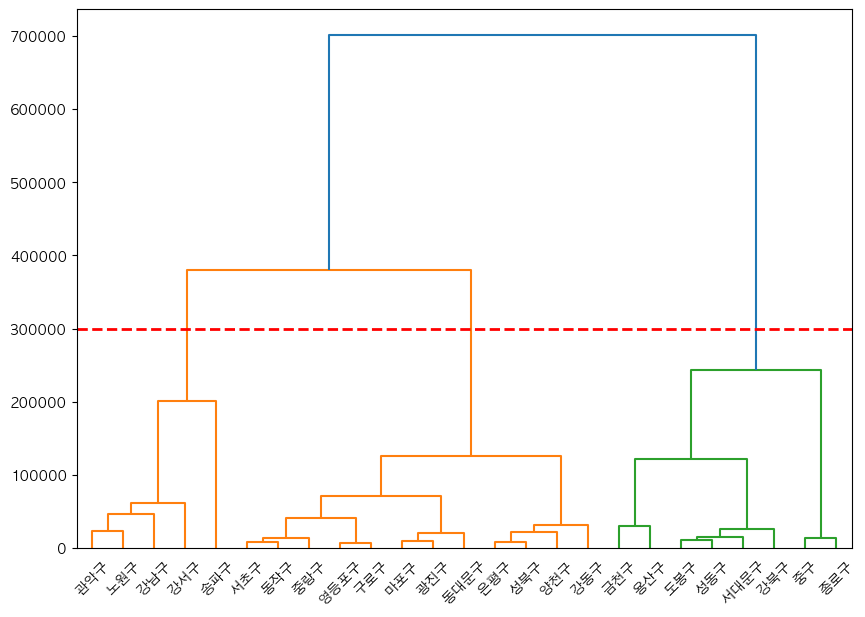

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))

dendrogram(ward,
          orientation='top',
          labels = covid.T.drop('날짜').index.tolist(),
          distance_sort='descending',
          show_leaf_counts=True)
plt.axhline(300000, color='r', lw=2, linestyle='--')
plt.show()

In [87]:
clusters = fcluster(ward, 300000, 'distance')
cluster_df['cluster'] = clusters
cluster_df

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,cluster
종로구,37261,36216,35276,34879,34061,35766,32267,31283,29872,28851,...,0,0,0,0,0,0,0,3,3,1
중구,33753,32835,31878,31577,30903,32582,29329,28381,27191,26097,...,0,0,0,0,0,0,0,0,0,1
용산구,55376,53872,52391,51652,50720,49989,48249,46631,44587,43051,...,0,0,0,0,0,0,0,0,0,1
성동구,81018,79030,76802,76108,74178,74512,70598,68474,65430,63199,...,0,0,0,0,0,0,0,0,0,1
광진구,96008,93474,91030,89876,87770,86488,83280,80149,76850,75116,...,0,0,0,0,0,0,0,0,0,2
동대문구,95433,92993,90277,89302,87345,85386,83093,80636,77498,74684,...,0,0,0,0,0,0,0,0,0,2
중랑구,103288,100255,97419,96359,93690,91639,88856,85857,82352,79294,...,0,0,0,0,0,0,0,1,1,2
성북구,116862,113609,110583,109500,106437,102491,100893,97056,92465,90297,...,0,0,0,0,0,0,0,2,2,2
강북구,75118,72934,70754,70003,68329,68116,64872,62635,60062,57799,...,0,0,0,0,0,0,0,0,0,1
도봉구,82254,79677,77878,76542,75119,73167,71160,68818,65823,63636,...,0,0,0,0,0,0,0,0,0,1


In [96]:
cluster_df.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
cluster,,,,,,,,,,,,,,,,,,,,,
1,63550.125,61763.625000,60043.75,59285.625000,57984.875000,57997.5,54966.250000,53188.5,50926.750000,49101.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.375000
2,108147.000,104794.083333,102270.75,100884.916667,98450.583333,95802.0,93175.666667,89929.0,85825.083333,83388.916667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333
3,145798.000,141340.400000,137587.20,135614.200000,132330.800000,126678.8,125266.200000,121311.4,115713.600000,112100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.400000


In [90]:
cluster_df.index[cluster_df['cluster']==3]

Index(['노원구', '강서구', '관악구', '강남구', '송파구'], dtype='object')

In [98]:
df = pd.DataFrame([[16, 12, 18], [30, 20, 13], [12, 3, 14]],
            index=['3.5~4.5', '2.5~3.5', '1.5~2.5'],
            columns=['사회과학', '자연과학', '공학'])
df

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


In [100]:
help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [102]:
chi2, p, dof, expected = stats.chi2_contingency(df)

In [110]:
expected = pd.DataFrame(expected,
            index=['3.5~4.5', '2.5~3.5', '1.5~2.5'],
            columns=['사회과학', '자연과학', '공학'])

In [105]:
p

0.03719883770303157

In [111]:
print('귀무가설 : 학점과 학과는 독립이다.')
print('연구가설 : 학점과 학과는 독립이 아니다.')
print('기대값 : \n', expected)
print(f'검정통계랑 : {chi2:.4f}, p-value : {p:.4f} -> 연구가설 채택')

귀무가설 : 학점과 학과는 독립이다.
연구가설 : 학점과 학과는 독립이 아니다.
기대값 : 
               사회과학       자연과학         공학
3.5~4.5  19.333333  11.666667  15.000000
2.5~3.5  26.478261  15.978261  20.543478
1.5~2.5  12.188406   7.355072   9.456522
검정통계랑 : 10.1994, p-value : 0.0372 -> 연구가설 채택


# 4회 기출동형 모의고사

오차의한계가 5% 이하가 되도록하는 최소 표본 사이즈

$Z_{0.05} = \frac{8}{^2\sqrt n} \le 0.05$

- 은 가격

In [114]:
data = pd.read_csv('../data/26_problem4.csv')
data

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [160]:
ts = data.T
ts_ma = ts.rolling(3).mean()

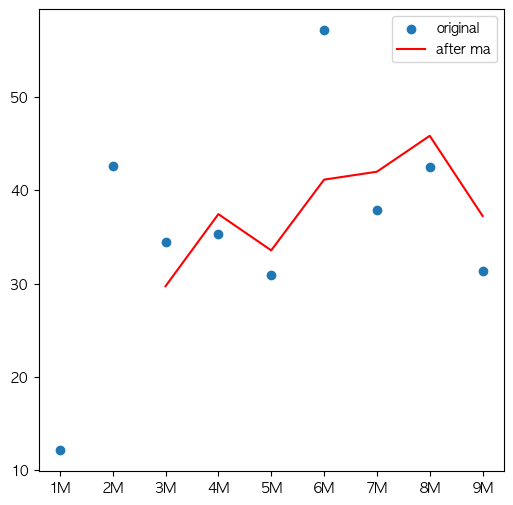

In [167]:
plt.figure(figsize=(6, 6))
plt.scatter(x = data.T.index, y=data.T.values, label='original')
plt.plot(ts_ma, color='red', label='after ma')
plt.legend()
plt.show()

In [162]:
m1 = df.loc['1M'].values[0]
m9 = df.loc['9M'].values[0]

In [163]:
from sympy import symbols, Eq, solve

# 변수 정의
x = symbols('x')

# 일차방정식 정의
equation = Eq(m1*x, m9)

# 방정식 풀기
solution = solve(equation, x)

# 결과 출력
print("해:", solution)

해: [2.58484349258649]


In [172]:
round(solution[0] * 100, 1)

258.5

# 자치구별 지지율

- 자치구별 지지율이 같은 지 검정

In [176]:
data = pd.DataFrame([[176, 193, 159], [124, 107, 141]],
                    columns = ['A', 'B', 'C'],
                   index=['찬성', '반대'], dtype='int')
data

,A,B,C
찬성,176,193,159
반대,124,107,141


전체 sum해서 지지율 -> 기대 빈도!


In [212]:
data.loc['찬성'].sum()

528

In [213]:
p_rate = data.loc['찬성'].sum() / data.sum().sum()
p_rate

0.5866666666666667

In [208]:
stats.chisquare(f_obs = data['A'], f_exp = [300 * p_rate, 300 * (1-p_rate)])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [209]:
stats.chisquare(f_obs = data['B'], f_exp = [300 * p_rate, 300 * (1-p_rate)])

Power_divergenceResult(statistic=3.972690615835777, pvalue=0.046243824434828294)

In [210]:
stats.chisquare(f_obs = data['C'], f_exp = [300 * p_rate, 300 * (1-p_rate)])

Power_divergenceResult(statistic=3.972690615835777, pvalue=0.046243824434828294)

- 전체 지지율 : 58.67%일 때, 각 자치구별 지지율도 58.67%가 나와야함
 - 귀무가설 : 자치구별 지지율이 같다.
 - 대립가설 : 자치구별 지지율이 다르다.
 
 - 각 자치구별 카이제곱 검정(적합성 검정)을 시행하여 기대 빈도를 검정한 결과, p-value가 0.045로 유의수준 0.05%에서 귀무가설 기각됨

In [216]:
stats.chi2_contingency(data)

(7.945381231671554,
 0.01882272023214683,
 2,
 array([[176., 176., 176.],
        [124., 124., 124.]]))

## 남녀 학생 평균 혈압 차이 검정

In [217]:
data = pd.read_csv('../data/26_problem6.csv')
data

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0
5,male,83.9
6,male,91.2
7,male,103.2
8,male,83.0
9,male,101.2


In [225]:
male = data[data['gender'] == 'male']['pressure']
female = data[data['gender'] == 'female']['pressure']

In [226]:
male.shape, female.shape

((16,), (9,))

- 귀무가설 : 남녀 학생의 혈압 차이는 없다.
- 대립가설 : 남며 학생의 혈압 차이가 있다.

In [229]:
stats.ttest_ind(male, female, equal_var=True, alternative='two-sided')
# 남녀 혈압차이는 없다.

Ttest_indResult(statistic=1.3813481801194591, pvalue=0.18044550626193734)

In [233]:
data['pressure']

0     106.8
1     100.8
2      84.5
3     104.2
4     107.0
5      83.9
6      91.2
7     103.2
8      83.0
9     101.2
10     97.1
11     90.9
12     85.2
13    106.2
14    103.1
15     91.2
16     92.7
17     90.1
18     83.1
19     83.2
20     85.3
21     82.8
22    108.8
23     87.4
24    104.9
Name: pressure, dtype: float64

In [231]:
help(stats.t.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(alpha, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Confidence interval with equal areas around the median.
    
    Parameters
    ----------
    alpha : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.



In [250]:
def sp(data1, data2):
    df = len(data1) + len(data2) - 2
    s1 = (len(data1) - 1) * (data1.std() ** 2)
    s2 = (len(data2) - 1) * (data1.std() ** 2)
    sp = np.sqrt((s1 + s2) / df)
    return sp

In [253]:
alpha = 0.95
dof = len(male) + len(female) - 2
diff_mean = male.mean() - female.mean()
s = sp(male, female) * (1/len(male) + 1/len(female))
CI = stats.t.interval(alpha, dof, loc=diff_mean, scale=s)
CI

(2.0868295351536026, 8.50622602040202)

# 키 몸무게 허리둘레

In [255]:
data = pd.read_csv('../data/26_problem7.csv')
data

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499
...,...,...,...
406,174.207,73.736,80.1779
407,174.702,74.529,80.1306
408,176.858,76.083,80.4527
409,175.566,76.459,80.2019


In [265]:
from sklearn.linear_model._bayes import ARDRegression
help(ARDRegression)

Help on class ARDRegression in module sklearn.linear_model._bayes:

class ARDRegression(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ARDRegression(*, n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, normalize='deprecated', copy_X=True, verbose=False)
 |  
 |  Bayesian ARD regression.
 |  
 |  Fit the weights of a regression model, using an ARD prior. The weights of
 |  the regression model are assumed to be in Gaussian distributions.
 |  Also estimate the parameters lambda (precisions of the distributions of the
 |  weights) and alpha (precision of the distribution of the noise).
 |  The estimation is done by an iterative procedures (Evidence Maximization)
 |  
 |  Read more in the :ref:`User Guide <bayesian_regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_iter : int, default=300
 |      Maximum number of iterations.
 |  
 |  tol : float, default=1e-3

In [266]:
X = data.drop('weight', axis=1)
y = data['weight']

In [267]:
ard = ARDRegression()
ard.fit(X, y)

ARDRegression()

In [269]:
ard.coef_
ard.predict([[180, 81]])

/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ARDRegression was fitted with feature names
  "X does not have valid feature names, but"


array([80.06790102])

In [270]:
previous_year_2 = 100000  # 2년 전 생산량
previous_year_1 = 150000  # 1년 전 생산량
current_year = 250000     # 현재 생산량

average_growth_rate = ((current_year / previous_year_2) ** (1/2) - 1) * 100
print("연평균 상승률: {:.2f}%".format(average_growth_rate))


연평균 상승률: 58.11%


In [271]:
3.2 ** (1/2)

1.7888543819998317

In [272]:
np.sqrt(3.2)

1.7888543819998317